<a href="https://colab.research.google.com/github/Hasanmog/Journey-Through-AI-Learning/blob/main/DeepLearning_With_Python/DeepLearning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for ComputerVision


## Introduction

working with the MNIST dataset (handwritten numbers)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models , datasets , utils

In [ ]:
model = models.Sequential()

# NN
model.add(layers.Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (28,28 , 1))) # (3,3) is the size of the window where the conv learn local patterns
model.add(layers.MaxPooling2D(2 , 2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))


In [ ]:
model.summary()

In [ ]:
# In order to make the prediction , we need a densley connected classifier
# Dense layer takes 1D tensor only !
# Therfore we need to transform the data coming from the NN(3D) to 1D

model.add(layers.Flatten()) # used to convert to 1D --> (x , y , z) --> (x * y * z)
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dense(10 , activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data() # X --> images(inputs) , y --> labels (target)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# we have 60,000 training samples

In [ ]:
print(y_train.shape)
print(y_train[:10])

In [ ]:
x_train = x_train.reshape((60000 , 28 , 28 , 1)) # adding the channel dimension which is 1 here (grey-scale)
x_test = x_test.reshape((10000 , 28 , 28 , 1))

x_train = x_train / 255 # normalize
x_test = x_test / 255

y_train = utils.to_categorical(y_train) # Converts a class vector (integers) to binary class matrix.
print(y_train[:10])
print(y_train.shape)

y_test = utils.to_categorical(y_test)


In [ ]:
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train , y_train , batch_size = 64 , epochs = 5 )

## Training a ConvNet from Scratch

### Installing dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "hasanmog"  # replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "f3ccafa264265fe4f3baf59bda89bd0f"  # replace with your Kaggle key


In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats # after -d replace with owner_name/dataset_name

In [ ]:
!unzip dogs-vs-cats.zip

### Dataset Prep

In [ ]:
import os , shutil

In [ ]:
os.mkdir("dataset")
os.mkdir("dataset/train")
os.mkdir("dataset/val")
os.mkdir("dataset/test")

In [ ]:
orig_train_dir = 'train/train'
orig_test_dir = 'test/test'

In [ ]:
animals = ['cat' , 'dog']
samples = 500 # train 1000 , val 500 , test 500
sample_per_animal = int(samples/len(animals))

train_dir = 'dataset/train/'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

for animal in animals:
  print(f"now {animal}")
  for sample in range(sample_per_animal ):
    ex = f"{animal}.{sample+1000}.jpg" # when adding samples to the val_dir , add 1000 to the sample
    print(ex)
    src = os.path.join(orig_train_dir , ex)
    dest = os.path.join(val_dir , ex) # replace train_dir with val_dir for validation split
    shutil.copyfile(src , dest)

In [10]:
samples = 499
test_samples = os.listdir(orig_test_dir)
s = test_samples[:samples+1]

for sample in s:

  src = os.path.join(orig_test_dir , sample)
  dest = os.path.join(test_dir , sample )
  shutil.copyfile(src , dest)


In [17]:
train_samples = os.listdir(train_dir)
# note , for test it will return 0 , since the samples are not named after the animal
val_samples = os.listdir(val_dir)
test_samples = os.listdir(test_dir)

print("number of training samples" , len(train_samples))
print("number of val samples" , len(val_samples))
print("number of test samples" , len(test_samples))

dogs = 0
cats = 0

for train in train_samples : #change the train_samples to val_samples

  if train.startswith('dog'):
    dogs+=1

  if train.startswith('cat'):
    cats+=1


print("number of dogs samples" , dogs)
print("number of cats samples" , cats)

number of training samples 1000
number of val samples 500
number of test samples 501
number of dogs samples 500
number of cats samples 500


In [42]:
import cv2

img = cv2.imread(os.path.join(train_dir , train_samples[10]))

size = (250 , 250)

img = cv2.resize(img , size)

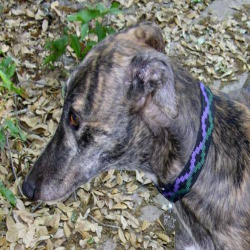

In [43]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [62]:
print(train_samples[0])

dog.319.jpg


In [ ]:
import os

base_train_dir = "dataset/train"
base_val_dir = "dataset/val"
base_test_dir = "dataset/test"

dogs = []
cats = []

for m in os.listdir(base_val_dir):

  if  m.startswith('dog'):
    dogs.append(m)

  if m.startswith('cat'):
    cats.append(m)

# train_dogs_dir = os.mkdir("dataset/train/dogs")
# train_cats_dir = os.mkdir("dataset/train/cats")
# val_dogs_dir = os.mkdir("dataset/val/dogs")
# val_cats_dir = os.mkdir("dataset/val/cats")

for i in dogs:
  src = os.path.join(base_val_dir , i)
  dest = "dataset/val/dogs"
  shutil.move(src , dest)

for i in cats:
  src = os.path.join(base_val_dir , i)
  dest = "dataset/val/cats"
  shutil.move(src , dest)

### Building Network

In [103]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32  , (3,3) , activation = 'relu' , input_shape = (250 , 250 ,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 124, 124, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 61, 61, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 29, 29, 128)      

In [105]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4) , loss = 'binary_crossentropy' , metrics = ['acc'] )

In [126]:
train_dir = 'dataset/train/'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

In [132]:
#DataLoading

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (250,250) ,
                                                    batch_size = 20 ,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_dir ,
                                                        target_size = (250,250) ,
                                                        batch_size = 25 ,
                                                        class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [133]:
#testing dataloader:

for data_batch , labels_batch in train_generator :
  print('data' , data_batch.shape)
  print('labels' , labels_batch.shape)
  break

data (20, 250, 250, 3)
labels (20,)


In [ ]:
history = model.fit_generator(train_generator ,
                              steps_per_epoch = 50 ,
                              epochs = 10 ,
                              validation_data = validation_generator ,
                              validation_steps = 20)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/10


<ipython-input-135-6bcbc0af4180>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator ,


50/50 [==============================] - 97s 2s/step - loss: 0.6780 - acc: 0.5860 - val_loss: 0.6618 - val_acc: 0.6040
Epoch 2/10
50/50 [==============================] - 96s 2s/step - loss: 0.6560 - acc: 0.6460 - val_loss: 0.6955 - val_acc: 0.5940
Epoch 3/10
50/50 [==============================] - 95s 2s/step - loss: 0.6208 - acc: 0.6720 - val_loss: 0.6303 - val_acc: 0.6360
Epoch 4/10
50/50 [==============================] - 95s 2s/step - loss: 0.5831 - acc: 0.6980 - val_loss: 0.6774 - val_acc: 0.6100
Epoch 5/10
17/50 [=========>....................] - ETA: 55s - loss: 0.5581 - acc: 0.7235

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc)+1)

plt.plot(epochs , acc , 'bo' , label = 'Training Acc')
plt.plot(epochs , val_acc , 'b' , label = 'Val Acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Val loss')
plt.title("Training vs Validation loss")
plt.legend()

plt.show()